# Text Classification

Text classification is the process of assigning tags or categories to text according to its content. It’s one of the fundamental tasks in natural language processing. 

The text we wanna classify is given as input to an algorithm, the algorithm will then analyze the text’s content, and then categorize the input as one of the tags or categories previously given.

**Input → Classifying Algorithm → Classification of Input**

Real life examples: 

+ sentiment analysis: how does the writer of the sentence feel about what they are writing about, do they think positively or negatively of the subject?Ex. restaurant reviews
+ topic labeling: given sentences and a set of topics, which topic does this sentence fall under?  Ex. is this essay about history? Math? etc?
+ spam detection. Ex. Email filtering: is this email a real important email or spam?

Example. 
A restaurant wants to evaluate their ratings but don’t want to read through all of them. Therefore, they wanna use a computer algorithm to do all their work. They simply want to know if the customer’s review is positive or negative.

Here’s an example of a customer’s review and a simple way an algorithm could classify their review.

Input: “The food here was too salty and too expensive” 

Algorithm: 
Goes through every word in the sentence and counts how many positive words and how many negative words are in the sentence.

		“The, food, here, was, too, and” are all neutral words

		“Salty, expensive” are negative words.

		Negative words: 2
		Positive words: 0

Classification: Negative Review, because there are more negative words (2) than positive (0).

However, this algorithm obviously doesn’t work in a lot of cases. 

For example, “The food here was good, not expensive and not salty” would be classified as negative but it’s actually a positive review. 

Language and text can get very complicated which makes creating these algorithms difficult. Some things that make language difficult could be words that have multiple meanings, negation words (words such as not), slang, etc.



## Importing Data

In [2]:
import sys
import string
from scipy import sparse
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from IPython.display import display
import ipywidgets as widgets

# Our two files that contain our data, split up into a training set and a testing set.

trainingFile = "dataset/trainingSet.txt"
testingFile = "dataset/testSet.txt"

Mounted at /content/gdrive


In [3]:
def getData(fileName):
    f = open(fileName)
    file = f.readlines()

    sentences = []
    sentiments = []

    for line in file:
        sentence, sentiment = line.split('\t')
        sentences.append(sentence.strip())
        sentiments.append(int(sentiment.strip())) # Sentiment in {0,1}

    return sentences, np.array(sentiments)

In [4]:
trainingSentences, trainingLabels = getData(trainingFile)
testingSentences, testingLabels = getData(testingFile)

## Pre-Processing Data

In [5]:
def cleanText(sentence):

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

def preProcess(text):
    # Make lower case
    text = text.lower()

    # Replace non-text characters with spaces
    nonText = string.punctuation + ("")
    text = text.translate(str.maketrans(nonText, ' ' * (len(nonText))))

    # Tokenize
    words = text.split()

    return words

Wow Loved this place 
[['wow', 'loved', 'this', 'place'], ['not', 'tasty', 'and', 'the', 'texture', 'was', 'just', 'nasty'], ['stopped', 'by', 'during', 'the', 'late', 'may', 'bank', 'holiday', 'off', 'rick', 'steve', 'recommendation', 'and', 'loved', 'it'], ['the', 'selection', 'on', 'the', 'menu', 'was', 'great', 'and', 'so', 'were', 'the', 'prices'], ['now', 'i', 'am', 'getting', 'angry', 'and', 'i', 'want', 'my', 'damn', 'pho'], ['honeslty', 'it', 'didn', 't', 'taste', 'that', 'fresh'], ['the', 'potatoes', 'were', 'like', 'rubber', 'and', 'you', 'could', 'tell', 'they', 'had', 'been', 'made', 'up', 'ahead', 'of', 'time', 'being', 'kept', 'under', 'a', 'warmer'], ['the', 'fries', 'were', 'great', 'too'], ['a', 'great', 'touch'], ['service', 'was', 'very', 'prompt'], ['the', 'cashier', 'had', 'no', 'care', 'what', 'so', 'ever', 'on', 'what', 'i', 'had', 'to', 'say', 'it', 'still', 'ended', 'up', 'being', 'wayyy', 'overpriced'], ['i', 'tried', 'the', 'cape', 'cod', 'ravoli', 'chicken'

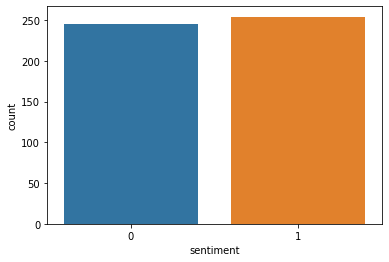

In [6]:
train_sentence = []
train_words = []
test_sentence = []
test_words = []
# get cleaned sentences and bag of words
for sen in trainingSentences:
    train_sentence.append(cleanText(sen))
    train_words.append(preProcess(sen))
for sen in testingSentences:
    test_sentence.append(cleanText(sen))
    test_words.append(preProcess(sen))
print(train_sentence[0])


print(train_words)

import seaborn as sns
import pandas as pd
train_df = pd.DataFrame(data=trainingLabels, columns=["sentiment"])
sns.countplot(x='sentiment', data=train_df)

## Getting Data and Setting it Up

In [7]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
def getVocab(sentences):
    vocab = set()
    for sentence in sentences:
        for word in sentence:
            vocab.add(word)
    return sorted(vocab)

In [9]:
vocabulary = getVocab(train_words)

In [10]:
def clicked(arg):
    print(vocabulary)

button_download = widgets.Button(description = 'Click to see Vocab')   
button_download.on_click(clicked)
display(button_download)

Button(description='Click to see Vocab', style=ButtonStyle())

['1', '10', '100', '11', '12', '2', '20', '2007', '3', '30', '35', '4', '40', '40min', '4ths', '5', '5lb', '7', '70', '8', '85', '99', 'a', 'about', 'above', 'absolute', 'absolutely', 'accomodate', 'across', 'actually', 'added', 'after', 'afternoon', 'again', 'ago', 'ahead', 'airport', 'albondigas', 'all', 'allergy', 'almonds', 'almost', 'alone', 'also', 'although', 'always', 'am', 'amazing', 'ambiance', 'ambience', 'amount', 'an', 'and', 'angry', 'another', 'anticipated', 'any', 'anything', 'anytime', 'anyway', 'apologize', 'app', 'appalling', 'appetizers', 'apple', 'approval', 'are', 'area', 'aren', 'aria', 'around', 'arrives', 'arriving', 'as', 'ask', 'asked', 'at', 'ate', 'atmosphere', 'atrocious', 'attack', 'attention', 'attentive', 'attitudes', 'auju', 'authentic', 'average', 'avocado', 'avoid', 'avoided', 'away', 'awesome', 'awful', 'awkward', 'az', 'baba', 'baby', 'back', 'bacon', 'bad', 'bagels', 'bakery', 'baklava', 'bamboo', 'bank', 'bar', 'barely', 'bargain', 'bartender', '

In [11]:
def createVector(vocab, sentences):
    indices = []
    wordOccurrences = []

    for sentenceIndex, sentence in enumerate(sentences):
        alreadyCounted = set() # Keep track of words so we don't double count.
        for word in sentence:
            if (word in vocab) and word not in alreadyCounted:
                # If we just want {0,1} for the presence of the word (bernoulli NB),
                # only count each word once. Otherwise (multinomial NB) count each
                # occurrence of the word.
                
            
                #which sentence, which word
                indices.append((sentenceIndex, vocab.index(word)))
                
                wordOccurrences.append(1)
                alreadyCounted.add(word)

    # Unzip
    rows = [row for row, _ in indices]
    columns = [column for _, column in indices]

    sentenceVectors = sparse.csr_matrix((wordOccurrences, (rows, columns)), dtype=int, shape=(len(sentences), len(vocab)))

    return sentenceVectors

In [12]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(train_sentence)

X_train = tokenizer.texts_to_sequences(train_sentence)
X_test = tokenizer.texts_to_sequences(test_sentence)
print(X_train)

[[348, 168, 8, 14], [12, 169, 2, 1, 349, 3, 54, 247], [350, 70, 351, 1, 537, 248, 538, 539, 540, 541, 542, 352, 2, 168, 7], [1, 124, 30, 1, 202, 3, 19, 2, 21, 25, 1, 203], [82, 249, 170, 543, 2, 171, 22, 250, 204], [544, 7, 141, 63, 31, 94], [1, 353, 25, 38, 545, 2, 35, 95, 251, 29, 18, 71, 142, 49, 546, 10, 36, 205, 206, 547, 548], [1, 125, 25, 19, 126], [96, 19, 354], [16, 3, 20, 549], [1, 355, 18, 56, 356, 55, 21, 57, 30, 55, 18, 4, 97, 7, 127, 550, 49, 205, 551, 172], [6, 252, 1, 552, 553, 554, 72, 24, 555, 357], [6, 3, 556, 143, 3, 73, 173, 31, 3, 557, 558], [358, 359], [144, 3, 145, 98, 15, 16], [8, 14, 5, 12, 174, 64, 36, 253, 559, 128], [58, 12, 38, 27, 41], [1, 560, 561], [31, 207, 1, 360, 562, 563, 564, 8, 565, 5, 21, 13], [29, 83, 254, 108, 17, 255, 9], [256, 43, 257, 4, 99, 39, 11, 50, 258, 15, 51, 22, 11, 3, 566, 208, 39, 567, 3, 259, 209, 38, 84, 3, 361, 568], [210, 38, 8, 14, 211], [1, 50, 569, 129, 10, 1, 51, 3, 31, 7, 3, 20, 362], [363, 16, 1, 146, 142, 85, 109, 38, 3,

In [13]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 10

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
y_train = trainingLabels
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
y_test = testingLabels

In [14]:
from numpy import array
from numpy import asarray
from numpy import zeros

model = Sequential()
embedding_layer = Embedding(vocab_size, 100, input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=2 , validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           133200    
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1001      
Total params: 134,201
Trainable params: 1,001
Non-trainable params: 133,200
_________________________________________________________________
None
Epoch 1/20
4/4 - 1s - loss: 0.6930 - acc: 0.5190 - val_loss: 0.6913 - val_acc: 0.5553
Epoch 2/20
4/4 - 0s - loss: 0.6915 - acc: 0.5551 - val_loss: 0.6911 - val_acc: 0.5654
Epoch 3/20
4/4 - 0s - loss: 0.6902 - acc: 0.5832 - val_loss: 0.6908 - val_acc: 0.5553
Epoch 4/20
4/4 - 0s - loss: 0.6891 - acc: 0.5892 - val_loss: 0.6906 - val_acc: 0.5634
Epoch 5/20
4/4 - 0s - loss:

In [15]:
from sklearn.metrics import classification_report
# make a prediction
testingPredictions = (model.predict(X_test) > 0.5).astype("int32")
print(len(testingPredictions))
yhat_probabilities = model.predict(X_test > 0.5, batch_size=128)
print(yhat_probabilities)
target_names = ['negative', 'positive']
print(classification_report(testingLabels, testingPredictions, target_names=target_names))

497
[[0.5226097 ]
 [0.5226097 ]
 [0.53986204]
 [0.5247843 ]
 [0.5226097 ]
 [0.54984033]
 [0.5321772 ]
 [0.54377747]
 [0.54984033]
 [0.54377747]
 [0.5226097 ]
 [0.5513798 ]
 [0.54377747]
 [0.5226097 ]
 [0.5329096 ]
 [0.5513798 ]
 [0.5389705 ]
 [0.5389705 ]
 [0.54377747]
 [0.5226097 ]
 [0.5247843 ]
 [0.5513798 ]
 [0.54377747]
 [0.54377747]
 [0.54133373]
 [0.5513798 ]
 [0.54377747]
 [0.54377747]
 [0.54377747]
 [0.54133373]
 [0.5226097 ]
 [0.54377747]
 [0.54377747]
 [0.53986204]
 [0.54377747]
 [0.54377747]
 [0.54377747]
 [0.54377747]
 [0.5389705 ]
 [0.5513798 ]
 [0.53986204]
 [0.54377747]
 [0.53986204]
 [0.53986204]
 [0.5321772 ]
 [0.5226097 ]
 [0.5513798 ]
 [0.54377747]
 [0.54377747]
 [0.5329096 ]
 [0.5247843 ]
 [0.5226097 ]
 [0.53986204]
 [0.5513798 ]
 [0.54377747]
 [0.54377747]
 [0.5389705 ]
 [0.54377747]
 [0.54377747]
 [0.5226097 ]
 [0.5247843 ]
 [0.54377747]
 [0.5329096 ]
 [0.53986204]
 [0.54377747]
 [0.54377747]
 [0.5247843 ]
 [0.54377747]
 [0.54133373]
 [0.53986204]
 [0.54133373]
 [

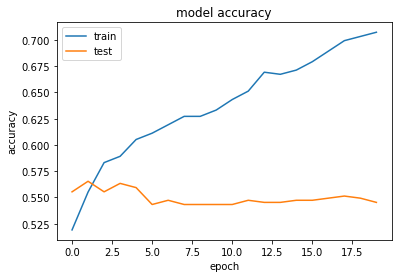

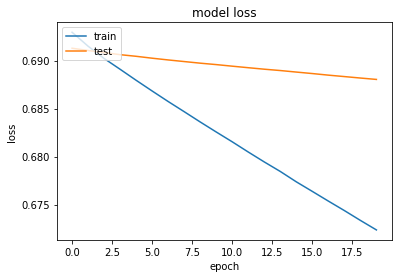

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

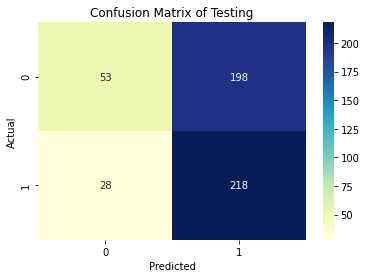

In [17]:
data = {'Actual':    testingLabels,
        'Predicted': testingPredictions.reshape(len(testingLabels),)
        }
#print(testingLabels.reshape(len(testingLabels),1))
df = pd.DataFrame(data, columns=['Actual','Predicted'])
confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True,cmap="YlGnBu", fmt='d').set_title('Confusion Matrix of Testing')
plt.show()

In [18]:
import json

data = []
for i in range(len(testingPredictions)):
  data.append({
      'index': i,
      'true_label': int(testingLabels[i]),
      'predicted_label': int(testingPredictions[i]),
      'confidence_score': yhat_probabilities.tolist()[i],
      'text': testingSentences[i]
  })

with open('predict.json', 'w') as outfile:
    json.dump(data, outfile, indent=4, sort_keys=False)

from google.colab import files
files.download('predict.json')



######################### dont run below cells ################################################

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# this model uses pre-trained Word2Vec from Google
import gensim
from gensim import models
from gensim.models import Word2Vec

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# train word2vec model
model = Word2Vec(train_words, size=100, window=5, workers=8, min_count=1)
# summarize vocabulary size in model
words = list(model.wv.vocab)
print(words)
print('Vocabulary size: %d' % len(words))

filename = 'embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

# load embedding as a dict
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r')
	lines = file.readlines()[1:]
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = asarray(parts[1:], dtype='float32')
	return embedding

# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
	# total vocabulary size plus 0 for unknown words
	vocab_size = len(vocab) + 1
	# define weight matrix dimensions with all 0
	weight_matrix = zeros((vocab_size, 100))
	# step vocab, store vectors using the Tokenizer's integer mapping
	for word, i in vocab.items():
		weight_matrix[i] = embedding.get(word)
	return weight_matrix

# load embedding from file
raw_embedding = load_embedding('embedding_word2vec.txt')
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)
# create the embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_vectors], input_length=maxlen, trainable=False)

model = Sequential()

model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model2.summary())

history = model2.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1)
score = model2.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:", score[1])

['wow', 'loved', 'this', 'place', 'not', 'tasty', 'and', 'the', 'texture', 'was', 'just', 'nasty', 'stopped', 'by', 'during', 'late', 'may', 'bank', 'holiday', 'off', 'rick', 'steve', 'recommendation', 'it', 'selection', 'on', 'menu', 'great', 'so', 'were', 'prices', 'now', 'i', 'am', 'getting', 'angry', 'want', 'my', 'damn', 'pho', 'honeslty', 'didn', 't', 'taste', 'that', 'fresh', 'potatoes', 'like', 'rubber', 'you', 'could', 'tell', 'they', 'had', 'been', 'made', 'up', 'ahead', 'of', 'time', 'being', 'kept', 'under', 'a', 'warmer', 'fries', 'too', 'touch', 'service', 'very', 'prompt', 'cashier', 'no', 'care', 'what', 'ever', 'to', 'say', 'still', 'ended', 'wayyy', 'overpriced', 'tried', 'cape', 'cod', 'ravoli', 'chicken', 'with', 'cranberry', 'mmmm', 'disgusted', 'because', 'pretty', 'sure', 'human', 'hair', 'highly', 'recommended', 'waitress', 'little', 'slow', 'in', 'is', 'worth', 'your', 'let', 'alone', 'vegas', 'did', 'at', 'all', 'burrittos', 'blah', 's', 'right', 'red', 'velve

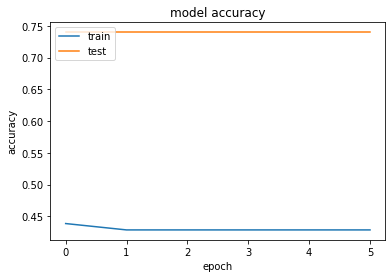

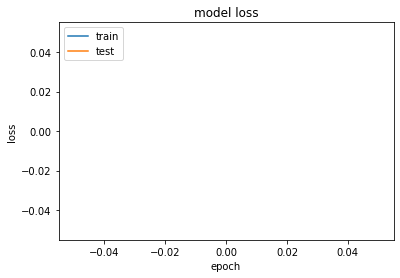

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
def accuracy(predictions, actual):
    return sum((predictions == actual)) / len(actual)

In [ ]:
train_confidence_scores, trainingPredictions = nbClassifier.predict(training)
test_confidence_scores, testingPredictions = nbClassifier.predict(testing)



312820103e-06, 3.343127081284343e-06], [1.0429319733369346e-08, 1.2346776152470574e-07], [2.4520622256110316e-12, 1.2538845790920111e-12], [0.03380197895791584, 0.0019877812304771487], [1.350687046504654e-23, 3.5826967735871363e-25], [8.836086066793038e-29, 1.303078547387358e-25], [1.0741319721877296e-06, 3.059617774625391e-08], [2.563643104178912e-23, 4.7919856096583716e-23], [4.5893091238197026e-18, 3.980582076268672e-21], [3.830383589526779e-37, 2.662190344559893e-32], [1.1390109171469797e-13, 4.351699056912264e-12], [8.315149295561593e-18, 6.482662238494719e-19], [3.546610488584047e-21, 2.1777803272645443e-18], [6.990298957289591e-05, 8.047697289381167e-06], [5.506281109065553e-13, 5.436337451350784e-13], [3.703424559755498e-12, 3.460047800669032e-14], [3.072861634906724e-25, 2.9804247677836746e-27], [3.827299199009152e-14, 9.970704412261283e-13], [3.725179608670154e-18, 7.731832658368737e-15], [1.0315545336278034e-05, 6.516354080470573e-08], [1.9643860747795065e-06, 7.253875182695

In [ ]:
def accuracy_button(arg):
    print("Training accuracy:", accuracy(trainingPredictions, trainingLabels))
    print("Testing accuracy:", accuracy(testingPredictions, testingLabels))

button_download = widgets.Button(description = 'Model Accuracy')   
button_download.on_click(accuracy_button)
display(button_download)

Button(description='Model Accuracy', style=ButtonStyle())

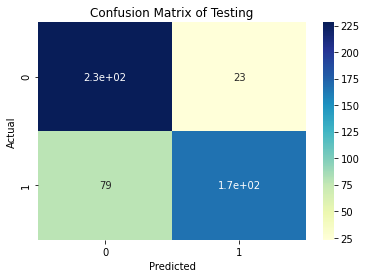

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'Actual':    testingLabels,
        'Predicted': testingPredictions
        }

df = pd.DataFrame(data, columns=['Actual','Predicted'])
confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,cmap="YlGnBu").set_title('Confusion Matrix of Testing')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['negative', 'positive']
print(classification_report(testingLabels, testingPredictions, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.74      0.91      0.82       251
    positive       0.88      0.68      0.77       246

    accuracy                           0.79       497
   macro avg       0.81      0.79      0.79       497
weighted avg       0.81      0.79      0.79       497



In [1]:
import json

data = []
for i in range(len(testingPredictions)):
  data.append({
      'index': i,
      'true_label': int(testingLabels[i]),
      'predicted_label': int(testingPredictions[i]),
      'confidence_score': test_confidence_scores[i],
      'text': testingSentences[i]
  })

with open('predcit.json', 'w') as outfile:
    json.dump(data, outfile, indent=4, sort_keys=False)

NameError: ignored